&copy; 2019 by Pearson Education, Inc. All Rights Reserved. The content in this notebook is based on the book [**Python for Programmers**](https://amzn.to/2VvdnxE).

# 5. Sequences: Lists and Tuples

# 5.1 Introduction
* A deeper look at lists and tuples.
* Refer to elements of lists, tuples and strings.
* Pass lists and tuples to functions.
* Common list-manipulation methods.
* Functional-style programming: Lambdas, filtering, mapping, list comprehensions, generator expressions and generator functions.
* Intro to two-dimensional lists.
* Create a barplot using the Seaborn and Matplotlib visualization libraries. 

# 5.2 Lists
### Lists Typically Store Values of the _Same_ Data Type

In [1]:
c = [-45, 6, 0, 72, 1543]

In [2]:
c

[-45, 6, 0, 72, 1543]

### Accessing Elements of a List

![Diagram of the list c labeled with its element names](ch05images/AAEMYRO0.png "Diagram of the list c labeled with its element names")

### Indices Are Integers That Begin at 0 and Must Be in Bounds to Prevent Exceptions

In [3]:
c[0]

-45

In [4]:
c[4]

1543

In [5]:
c[10]

IndexError: list index out of range

### Determining a List’s Length with the Built-In **`len` Function**

In [6]:
len(c)

5

### Accessing Elements from the End of the List with Negative Indices
![Diagram of the list c labeled with its negative indices](ch05images/AAEMYRO0_2.png "Diagram of the list c labeled with its negative indices")

In [7]:
c[-1]

1543

### Lists Are Mutable (Modifiable)

In [8]:
c[4] = 17

In [9]:
c

[-45, 6, 0, 72, 17]

### Strings and Tuples Are Immutable
* Assigning to their elements causes a `TypeError`.

In [10]:
s = 'hello'

In [11]:
s[0]

'h'

In [12]:
s[0] = 'H'

TypeError: 'str' object does not support item assignment

### Concatenating Sequences of the Same Type with `+`
* **Two lists**, **two tuples** or **two strings**.
* Produces a **new sequence of the same type**.

In [13]:
list1 = [10, 20, 30]

In [14]:
list2 = [40, 50]

In [15]:
concatenated_list = list1 + list2

In [16]:
concatenated_list

[10, 20, 30, 40, 50]

### Accessing List Values Via the Subscription Operator (`[]`)


In [17]:
for i in range(len(list1)):  
    print(f'{i}: {list1[i]}')

0: 10
1: 20
2: 30


### Can Compare Entire Lists **Element-By-Element** Using Comparison Operators

In [18]:
a = [1, 2, 3]

In [19]:
b = [1, 2, 3]

In [20]:
c = [1, 2, 3, 4]

In [21]:
a == b  # True: corresponding elements in both are equal

True

In [22]:
a == c  # False: a and c have different elements and lengths

False

In [23]:
a < c  # True: elements 0-2 are equal but a has fewer elements than c

True

In [24]:
c >= b  # True: elements 0-2 are equal but c has more elements

True

# 5.3 Tuples
* Tuples are **immutable** and typically store **heterogeneous data**. 

### Creating an Empty Tuple

In [25]:
empty_tuple = ()

In [26]:
empty_tuple

()

In [27]:
len(empty_tuple)

0

### Packing a Tuple 

In [28]:
student_tuple = 'John', 'Green', 3.3

In [29]:
student_tuple  # tuples are always displayed in parentheses

('John', 'Green', 3.3)

In [30]:
len(student_tuple)

3

### Creating a One-Element Tuple

In [31]:
a_singleton_tuple = ('red',)  # comma is required; parentheses are not

In [32]:
a_singleton_tuple

('red',)

In [33]:
type(a_singleton_tuple)

tuple

### Accessing Tuple Elements
* Usually, you do not iterate over a tuple's elements. Rather, you access each individually. 

In [34]:
time_tuple = (9, 16, 1)

In [35]:
time_tuple

(9, 16, 1)

In [36]:
time_tuple[1]

16

### Adding Items to a String or Tuple
* `+=` augmented assignments can be used with strings and tuples, even though they’re **immutable**&mdash;**new objects are created**.
* For a string or tuple, the item to the right of `+=` must be a string or tuple, respectively. 
* Concatenating tuples **creates a _new_ tuple** and aims the variable `tuple1` at the new object.

In [37]:
tuple1 = (10, 20, 30)

In [38]:
tuple2 = tuple1

In [39]:
tuple2

(10, 20, 30)

In [40]:
tuple1 += (40, 50)  # does not modify original tuple that tuple1 referenced originally

In [41]:
tuple1

(10, 20, 30, 40, 50)

In [42]:
tuple2  # still refers to the original tuple

(10, 20, 30)

### Tuples May Contain Mutable Objects

In [43]:
student_tuple = ('Amanda', 'Blue', [98, 75, 87])

Even though the **tuple is immutable**&mdash;meaning you cannot assign new objects to each element&mdash;its **list element's contents are mutable**.

In [44]:
student_tuple[2][1] = 85

In [45]:
student_tuple

('Amanda', 'Blue', [98, 85, 87])

# 5.4 Unpacking Sequences

In [46]:
student_tuple = ('Amanda', [98, 85, 87])

In [47]:
first_name, grades = student_tuple  # 2 elements requires 2 variables

In [48]:
print(f"{first_name}'s grades: {grades}")

Amanda's grades: [98, 85, 87]


In [49]:
first, second = 'hi'  # 2 characters requires 2 variables

In [50]:
print(f'{first}  {second}')

h  i


In [51]:
number1, number2, number3 = [2, 3, 5]  # 3 elements requires 3 variables

In [52]:
print(f'{number1}  {number2}  {number3}')

2  3  5


In [53]:
number1, number2, number3 = range(10, 40, 10)  # produces 3 integers 

In [54]:
print(f'{number1}  {number2}  {number3}')

10  20  30


### Swapping Values Via Packing and Unpacking

In [55]:
number1 = 99

In [56]:
number2 = 22

In [57]:
number1, number2 = (number2, number1)

In [58]:
print(f'number1 = {number1}; number2 = {number2}')

number1 = 22; number2 = 99


### Accessing Indices and Values Safely with Built-in **Function `enumerate`**
* Preferred for accessing an element’s **index _and_ value** because it ensures that correct index numbers and corresponding elements are returned.

```python
# fig05_01.py
"""Displaying a bar chart"""
numbers = [19, 3, 15, 7, 11]

print('\nCreating a bar chart from numbers:')
print(f'Index{"Value":>8}   Bar')

for index, value in enumerate(numbers):  # produces (index, value) tuples
    print(f'{index:>5}{value:>8}   {"*" * value}')
```

In [59]:
run fig05_01.py


Creating a bar chart from numbers:
Index   Value   Bar
    0      19   *******************
    1       3   ***
    2      15   ***************
    3       7   *******
    4      11   ***********


# 5.5 Sequence Slicing
* **Slicing** creates new sequences containing **subsets** of the original elements. 
* Can **modify mutable sequences**.
* Slice operations that do **not** modify a sequence work identically for lists, tuples and strings.

### Specifying a Slice with Starting and Ending Indices
* Slices **make shallow copies**&mdash;the new object's and original object's elements refer to the same values.

In [60]:
numbers = [2, 3, 5, 7, 11, 13, 17, 19]

In [61]:
numbers[2:6]  # slice from index 2 through 5

[5, 7, 11, 13]

### Specifying a Slice with Only an Ending Index

In [62]:
numbers[:6]  # slice from beginning through index 5

[2, 3, 5, 7, 11, 13]

### Specifying a Slice with Only a Starting Index

In [63]:
numbers[6:]  # slice from index 6 to the end

[17, 19]

### Specifying a Slice with No Indices

In [64]:
numbers[:]  # slice from beginning to end

[2, 3, 5, 7, 11, 13, 17, 19]

### Slicing with Steps

In [65]:
numbers[::2]  # 2 is the step; selects every second element starting from index 0

[2, 5, 11, 17]

### A Negative Step Selects a Slice in Reverse Order

In [66]:
numbers[::-1]  # every element in reverse

[19, 17, 13, 11, 7, 5, 3, 2]

### Deleting Elements By Assigning an _Empty_ List to a Slice

In [67]:
numbers

[2, 3, 5, 7, 11, 13, 17, 19]

In [68]:
numbers[0:3] = []  # deletes elements 0-2, but also can replace elements

In [69]:
numbers

[7, 11, 13, 17, 19]

In [70]:
numbers[:] = []  # deletes all elements 0-2

In [71]:
numbers

[]

# 5.6 Removing List Elements with the `del` Statement

### Deleting the Element at a Specific List Index


In [72]:
numbers = list(range(0, 10))

In [73]:
numbers

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [74]:
del numbers[0]

In [75]:
numbers

[1, 2, 3, 4, 5, 6, 7, 8, 9]

### Deleting a Slice from a List

In [76]:
del numbers[0:2]

In [77]:
numbers

[3, 4, 5, 6, 7, 8, 9]

### Deleting a Slice Representing the Entire List

In [78]:
del numbers[:]

In [79]:
numbers

[]

### Deleting a Variable from the Current Session

In [80]:
del numbers

In [81]:
numbers

NameError: name 'numbers' is not defined

# 5.7 Passing Lists to Functions
### A Function Can Modify a List Argument's Elements

In [82]:
def modify_elements(items):
    """"Multiplies all element values in items by 2."""
    for i in range(len(items)):
        items[i] *= 2

In [83]:
numbers = [10, 3, 7, 1, 9]

In [84]:
modify_elements(numbers)

In [85]:
numbers

[20, 6, 14, 2, 18]

# 5.8 Sorting Lists
### Sorting a List with an In-Place Sort

In [86]:
numbers = [10, 3, 7, 1, 9, 4, 2, 8, 5, 6]

In [87]:
numbers.sort()  # ascending by default

In [88]:
numbers

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [89]:
numbers.sort(reverse=True)  # descending

In [90]:
numbers

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

### Built-In Function `sorted` Creates a New List Containing Sorted Elements

In [91]:
numbers = [10, 3, 7, 1, 9, 4, 2, 8, 5, 6]

In [92]:
ascending_numbers = sorted(numbers)  # also can use reverse=True for descending sort

In [93]:
ascending_numbers

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# 5.9 Searching Sequences

### List Method `index` Returns the Index of the _First_ Element That Matches the Search Key or Raises a `ValueError`

In [94]:
numbers = [3, 7, 1, 4, 2, 8, 5, 6]

In [95]:
numbers.index(5)

6

* Also can specify additional arguments for the starting index and ending index in the range of elements to search.

### Operator `in`: Test Whether an Iterable Contains a Value

In [96]:
numbers

[3, 7, 1, 4, 2, 8, 5, 6]

In [97]:
1000 in numbers

False

In [98]:
5 in numbers

True

### Operator `not` `in`: Test Whether an Iterable Does Not Contain a Value

In [99]:
1000 not in numbers

True

In [100]:
5 not in numbers

False

# 5.10 Other List Methods 

### Method **`insert`** Adds a New Item at a Specified Index 

In [101]:
color_names = ['orange', 'yellow', 'green']

In [102]:
color_names.insert(0, 'red')

In [103]:
color_names

['red', 'orange', 'yellow', 'green']

### Adding an Element to the End of a List with Method **`append`**

In [104]:
color_names.append('blue')

In [105]:
color_names

['red', 'orange', 'yellow', 'green', 'blue']

### Adding All Elements of a Sequence to End of a List with Method **`extend`** 
* `extend` is equivalent to `+=`

In [106]:
color_names.extend(['indigo', 'violet'])  # requires one iterable argument

In [107]:
color_names

['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']

### Delete the First Element with a Specified Value with Method **`remove`** 

In [108]:
color_names.remove('green')  # ValueError if argument not in color_names

In [109]:
color_names

['red', 'orange', 'yellow', 'blue', 'indigo', 'violet']

### Emptying a List with Method **`clear`**

In [110]:
color_names.clear()

In [111]:
color_names

[]

### Counting the Number of Occurrences of an Item with Method **`count`**

In [112]:
responses = [1, 2, 5, 4, 3, 5, 2, 1, 3, 3, 
             1, 4, 3, 3, 3, 2, 3, 3, 2, 2]

In [113]:
for i in range(1, 6):
    print(f'{i} appears {responses.count(i)} times in responses')

1 appears 3 times in responses
2 appears 5 times in responses
3 appears 8 times in responses
4 appears 2 times in responses
5 appears 2 times in responses


### Reversing a List’s Elements with Method **`reverse`** 

In [114]:
color_names = ['red', 'orange', 'yellow']

In [115]:
color_names.reverse()

In [116]:
color_names

['yellow', 'orange', 'red']

# 5.12 List Comprehensions
* Concise way to create new lists. 
* Replaces using `for` to iterate over a sequence and create a list.

### Using a List Comprehension to Create a List of Integers
* For each `item`, the following list comprehension evaluates the expression to the left of the `for` clause and places that expression’s value in the new list. 

In [117]:
list1 = [item for item in range(1, 6)]  # or list(range(1, 6))

In [118]:
list1

[1, 2, 3, 4, 5]

### Functional-Style Mapping: Performing Operations in a List Comprehension’s Expression
* Produces new values (possibly of different types) from a sequence's elements. 

In [119]:
list2 = [item ** 3 for item in range(1, 6)]  # map 1-5 to their cubes

In [120]:
list2

[1, 8, 27, 64, 125]

### Functional-Style Filtering: List Comprehensions with `if` Clauses 
* **Selects** only those elements that **match a condition**. 

In [121]:
list3 = [item for item in range(1, 11) if item % 2 == 0]  # keep only even integeers

In [122]:
list3

[2, 4, 6, 8, 10]

### List Comprehension **`for` Clause** Can Process **Any Iterable** 

In [123]:
colors = ['red', 'orange', 'yellow']

In [124]:
colors2 = [item.upper() for item in colors]

In [125]:
colors2

['RED', 'ORANGE', 'YELLOW']

# 5.13 Generator Expressions
* Like list comprehensions, but create iterable **generator objects** that produce values **on demand**. 
* Known as **lazy evaluation**. 
* For large numbers of items, creating lists can take substantial memory and time. 
* **Generator expressions** can reduce memory consumption and improve performance if the whole list is not needed at once. 

In [126]:
for value in (x ** 2 for x in range(1, 6)):  # generator expressions defined in parentheses
    print(value, end='  ')

1  4  9  16  25  

* To show that a **generator expression does not create a list**, assign one to a variable.

In [127]:
squares_of_odds = (x ** 2 for x in range(1, 6))

In [128]:
squares_of_odds 

<generator object <genexpr> at 0x10d5659a8>

* Output indicates that `square_of_odds` is a **generator object** that was created from a **generator expression (`<genexpr>`)**.
* **Built-in function `next`** receives a generator or iterator and returns the next item.

In [129]:
next(squares_of_odds) 

1

# Generator Functions Also Return Values on Demand
* A generator function uses the **`yield`** rather than `return` to return the next generated item, then its
**execution suspends** until the program requests another item. 
* When Python encounters a **generator function call**, it creates an **iterable generator object** that keeps track of the next value to generate. 

In [130]:
def square_generator(values):
    for value in values:
        yield value ** 2

In [131]:
numbers = list(range(1, 4))  # list containing 1, 2, 3

In [132]:
squares = square_generator(numbers)  # the call creates the generator object

In [133]:
squares

<generator object square_generator at 0x10d464de0>

In [134]:
next(squares)

1

In [135]:
next(squares)

4

In [136]:
next(squares)

9

* When there are no more items, **generators**, **generator expressions** and **iterators** raise a **`StopIteration` exception**.
* This is how a `for` statement knows when to stop iterating.

In [137]:
next(squares)

StopIteration: 

### Iterate Over a Generator Object

In [138]:
numbers

[1, 2, 3]

In [139]:
for number in square_generator(numbers):
    print(number, end='  ')

1  4  9  

# 5.15 Other Sequence-Processing Functions 

### `key` Argument to Built-in Functions like `max`, `min` and `sorted`
* Assume you want to sort `colors` using **alphabetical** order, not **lexicographical** order.

In [140]:
colors = ['Red', 'orange', 'Yellow', 'green', 'Blue']

In [141]:
sorted(colors)  # performs lexicographical comparisons by default

['Blue', 'Red', 'Yellow', 'green', 'orange']

* To perform alphabetical sorting, convert each string to all lowercase or all uppercase letters first. 
* The **`key` keyword argument** must be a one-parameter function that returns a value. 
* Functions `max`, `min` and `sorted` each call their `key` argument’s function for each element and uses the results when comparing elements.
* For simple functions that `return` only a **single expression’s value**, you can use a **lambda expression** to define the function inline.

In [142]:
sorted(colors, key=lambda s: s.lower())  # lambda converts each string to lowercase before comparison

['Blue', 'green', 'orange', 'Red', 'Yellow']

* The preceding `lambda` is equivalent to a named function like:
```python
def tolower(s):
      return s.lower()
```


* The corresponding `sorted` call would be:
```python
sorted(colors, key=tolower)
```

### Iterating Backward Through a Sequence
* Built-in function **`reversed`** returns an iterator that enables you to iterate over a sequence’s values backward. 

In [143]:
numbers = [1, 2, 3, 4, 5]

In [144]:
reversed_numbers = [item ** 2 for item in reversed(numbers)]

In [145]:
reversed_numbers

[25, 16, 9, 4, 1]

### Combining Iterables into Tuples of Corresponding Elements
* Built-in function **`zip`** enables you to iterate over **_multiple_ iterables at the _same_ time**. 
* Returns an iterator that produces tuples containing the elements at the same index in each iterable. 
* For the following two lists, zip uses:
    * the elements at index 0 of each list to form the tuple `('Bob', 3.5)`
    * the elements at index 1 of each list to form the tuple `('Sue', 4.0)`
    * the elements at index 2 of each list to form the tuple `('Amanda', 3.75)`

In [146]:
names = ['Bob', 'Sue', 'Amanda']

In [147]:
grade_point_averages = [3.5, 4.0, 3.75] 

In [148]:
for name, gpa in zip(names, grade_point_averages):
    print(f'Name={name}; GPA={gpa}')

Name=Bob; GPA=3.5
Name=Sue; GPA=4.0
Name=Amanda; GPA=3.75


# 5.16 Two-Dimensional Lists
* Lists can contain other lists as elements. 

In [149]:
a = [[77, 68, 86, 73], 
     [96, 87, 89, 81], 
     [70, 90, 86, 81]]

### Iterating Through a Two-Dimensional List with Nested `for` Statements

In [150]:
for row in a:
    for item in row:
        print(item, end='  ')
    print()

77  68  86  73  
96  87  89  81  
70  90  86  81  


# 5.17 Simulation and Static Visualizations with Seaborn and Matplotlib
* Produce a **static bar chart** showing the final results of a six-sided-die-rolling simulation. 
* The **Seaborn visualization library** is built over the **Matplotlib visualization library** and simplifies many Matplotlib operations. 

## 5.17.2 Visualizing Die-Roll Frequencies and Percentages
* This example is also provided as a script in `RollDie.py`.

### Launching IPython for Interactive Matplotlib Development
>```python
ipython --matplotlib
```

or if you're already in an IPython session
>```python
%matplotlib
```


### Enabling Interactive Matplotlib in Jupyter or an Existing IPython Session

In [151]:
%matplotlib inline

### Importing the Libraries

In [152]:
import matplotlib.pyplot as plt  # Matplotlib graphing capabilities

In [153]:
import numpy as np  # Numercal Python (NumPy) library

In [154]:
import random

In [155]:
import seaborn as sns  # Seaborn visualization library

### Rolling the Die and Calculating Die Frequencies

In [156]:
rolls = [random.randrange(1, 7) for i in range(600)]  # 600 die rolls

In [157]:
values, frequencies = np.unique(rolls, return_counts=True)  # summarize rolls

### NumPy
* NumPy's **`unique` function** expects an `ndarray` argument and returns an `ndarray`. 
* If you pass a list, NumPy converts it to an `ndarray` for better performance. 
* Keyword argument **`return_counts`**`=True` tells `unique` to count each unique value’s number of occurrences
* In this case, `unique` returns a **tuple of two one-dimensional `ndarray`s** containing the **sorted unique values** and their corresponding frequencies, respectively. 

### Creating the Bar Plot

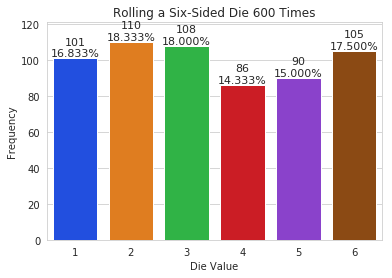

In [158]:
sns.set_style('whitegrid')  # default is white with no grid

# create and display the bar plot
# in a script, you must call plt.show() to display the plot
axes = sns.barplot(x=values, y=frequencies, palette='bright')

# set the title of the plot
title = f'Rolling a Six-Sided Die {len(rolls):,} Times'
axes.set_title(title)

# label the axes
axes.set(xlabel='Die Value', ylabel='Frequency')  

# scale the y-axis to add room for text above bars
axes.set_ylim(top=max(frequencies) * 1.10)

# create and display the text for each bar
for bar, frequency in zip(axes.patches, frequencies):
    text_x = bar.get_x() + bar.get_width() / 2.0  
    text_y = bar.get_height() 
    text = f'{frequency:,}\n{frequency / len(rolls):.3%}'
    axes.text(text_x, text_y, text, 
              fontsize=11, ha='center', va='bottom')

### Rolling Again and Updating the Bar Plot

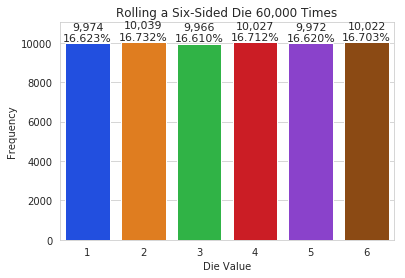

In [159]:
rolls = [random.randrange(1, 7) for i in range(60000)]  # roll 60,000 dice
values, frequencies = np.unique(rolls, return_counts=True)  # summarize rolls

sns.set_style('whitegrid')  # default is white with no grid

# create and display the bar plot
# in a script, you must call plt.show() to display the plot
axes = sns.barplot(x=values, y=frequencies, palette='bright')

# set the title of the plot
title = f'Rolling a Six-Sided Die {len(rolls):,} Times'
axes.set_title(title)

# label the axes
axes.set(xlabel='Die Value', ylabel='Frequency')  

# scale the y-axis to add room for text above bars
axes.set_ylim(top=max(frequencies) * 1.10)

# create and display the text for each bar
for bar, frequency in zip(axes.patches, frequencies):
    text_x = bar.get_x() + bar.get_width() / 2.0  
    text_y = bar.get_height() 
    text = f'{frequency:,}\n{frequency / len(rolls):.3%}'
    axes.text(text_x, text_y, text, 
              fontsize=11, ha='center', va='bottom')

# More Info 
* See Lesson 5 in [**Python Fundamentals LiveLessons** here on Safari Online Learning](https://learning.oreilly.com/videos/python-fundamentals/9780135917411)
* See Chapter 5 in [**Python for Programmers** on Safari Online Learning](https://learning.oreilly.com/library/view/python-for-programmers/9780135231364/)
* Interested in a print book? Check out:

| Python for Programmers | Intro to Python for Computer<br>Science and Data Science
| :------ | :------
| <a href="https://amzn.to/2VvdnxE"><img alt="Python for Programmers cover" src="../images/PyFPCover.png" width="150" border="1"/></a> | <a href="https://amzn.to/2LiDCmt"><img alt="Intro to Python for Computer Science and Data Science: Learning to Program with AI, Big Data and the Cloud" src="../images/IntroToPythonCover.png" width="159" border="1"></a>

>Please **do not** purchase both books&mdash;_Python for Programmers_ is a subset of _Intro to Python for Computer Science and Data Science_

&copy; 2019 by Pearson Education, Inc. All Rights Reserved. The content in this notebook is based on the book [**Python for Programmers**](https://amzn.to/2VvdnxE).